# Linear Algebra With Numpy

Juan Diego Perez Navarro  
T00067699  
Universidad Tecnológica de Bolívar


In [158]:
import numpy as np
import matplotlib.pyplot as plt


## Manipulating matrices

**EXERCISE** Compute $A ^ 2 - 2 A + 3$ with:

$$A =
\begin{pmatrix}
1 & -1\\
2 & 1
\end{pmatrix}
$$

Aclaración:

``` python
A@A != A**2
```

Aunque puede parecer ilógico, el problema no radica en las matemáticas, sino en el comportamiento de Numpy. La razón por la cual la afirmación anterior no es válida es la misma por la que `A @ A != A * A`. En el primer caso, se realiza una multiplicación matricial, que es lo esperado en el contexto del ejercicio. Sin embargo, en el segundo caso (`A ** 2` o `A * A`), Numpy realiza una multiplicación elemento a elemento, es decir, multiplica la posición (0, 0) de la primera matriz por la (0, 0) de la segunda, luego la posición (0, 1) por la (0, 1), y así sucesivamente. Esta operación resulta incorrecta en este contexto, aunque podría ser más útil en otros escenarios.

In [28]:
A = np.array([
    [1, -1],
    [2, 1]
])

result = A@A - 2*A + 3
print(result)

[[0 3]
 [3 0]]


## Solving Matrix equations

**EXERCISE** Compute the solutions to the matrix equation $Bx=b$ (using the $B$ defined earlier).

$$
B = \begin{pmatrix}
14 & -2 & 12\\
4 & 4 & 5\\
5 & 5 & 1
\end{pmatrix}
$$

$$
b = \begin{pmatrix}
-1\\
2\\
1
\end{pmatrix}
$$


In [19]:
B = np.array([[14, -2, 12],
               [4, 4, 5],
               [5, 5, 1]])

b = np.array([-1, 2, 1])

# `np.linalg.solve(a, b)` es la función para resolver ecuaciones de la forma
# ax = b, donde a es la matriz de coeficientes, x es el vector de incógnitas y b
# es el vector de resultados.
result = np.linalg.solve(B, b)
print(f"x = {result}")

# Confirmar que el resultado es correcto
# con ``np.allclose(a, b)` se compara si dos arreglos son iguales, con una
# tolerancia dada.
print(f"Bx = {(tmp := np.dot(B, result))}")
print(f"Bx = b? {np.allclose(tmp, b)}")

x = [-0.25892857  0.40178571  0.28571429]
Bx = [-1.  2.  1.]
Bx = b? True


## Matrix inversion and determinants

**EXERCISE** Compute the inverse and determinant of $B$ (defined previously).

$$
B = \begin{pmatrix}
14 & -2 & 12\\
4 & 4 & 5\\
5 & 5 & 1
\end{pmatrix}
$$


In [ ]:
B_inverse = np.linalg.inv(B)
det_B = np.linalg.det(B)

print(f"Determinante de B: {det_B}")
print(f"\nInversa de B: \n{B_inverse}")
print(f"\nEstá bien? B * B^1 = I  =>  \n{(tmp := np.dot(B, B_inverse))}")
print(np.allclose(tmp, np.eye(3)))  # Con np.eye(n) se crea una matriz identidad de nxn

Determinante de B: -336.0

Inversa de B: 
[[ 6.25000000e-02 -1.84523810e-01  1.72619048e-01]
 [-6.25000000e-02  1.36904762e-01  6.54761905e-02]
 [-1.09511795e-17  2.38095238e-01 -1.90476190e-01]]

Está bien? B * B^1 = I  =>  
[[ 1.00000000e+00  0.00000000e+00  1.11022302e-16]
 [ 7.55253758e-19  1.00000000e+00  8.32667268e-17]
 [ 4.45599717e-17 -3.33066907e-16  1.00000000e+00]]
True


## Rotations

**EXERCISE** Generate a triangle, and apply the same rotation. Observe how the shape changes with different rotation angles.


In [15]:
points = np.array([
    [-1, 0, 1, -1],
    [-1, 1, -1, -1]   
])

In [16]:
# Here is the function
def rotation_matrix(theta_degrees: float) -> np.ndarray:
    """
    Return the rotation matrix for a given angle theta in degrees.
    """
    theta_rad = np.deg2rad(theta_degrees)
    R = np.array([[np.cos(theta_rad), -np.sin(theta_rad)],
                  [np.sin(theta_rad), np.cos(theta_rad)]])
    return R


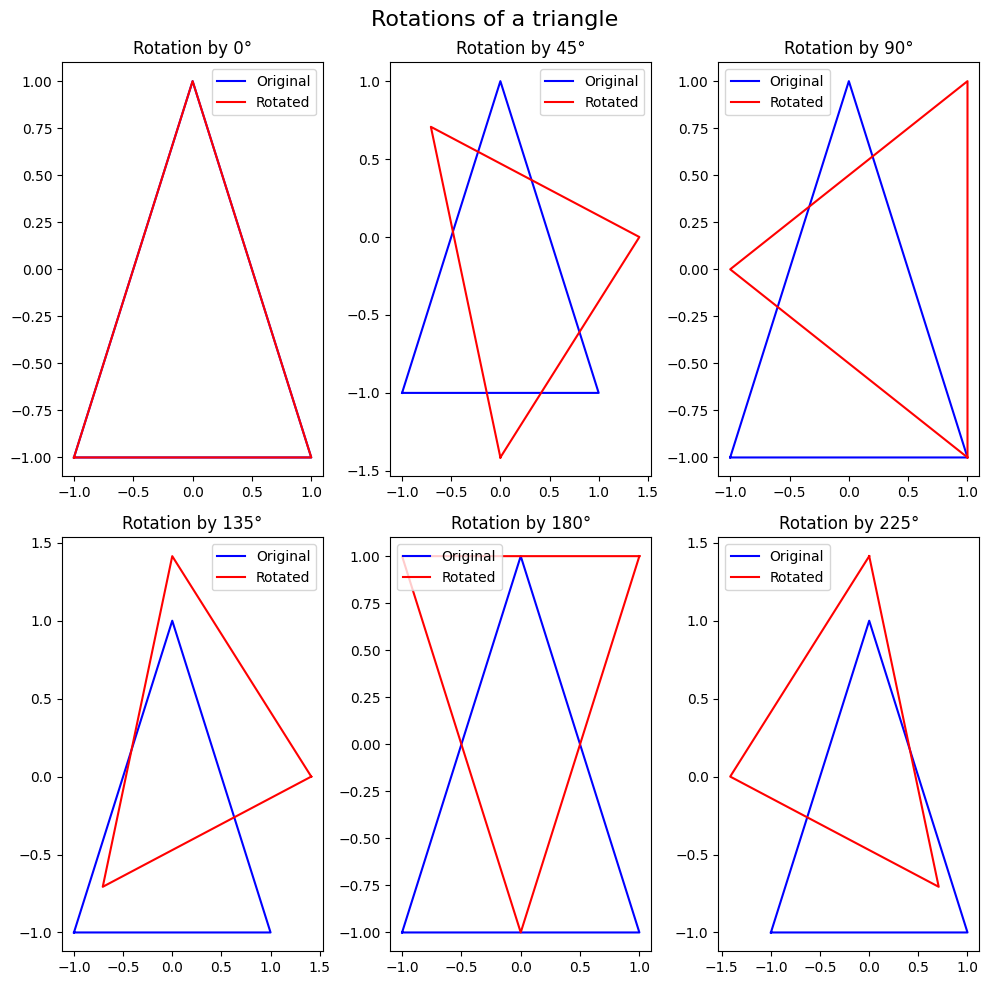

In [119]:
grid = (2, 3)  # grid of subplots
fig, axes = plt.subplots(*grid, figsize=(10, 10))
axes_flat = axes.flat
degrees = [i * 45 for i in range(len(axes_flat))] # make rotations every 45° (change if you want)

for degrees, ax in zip(degrees, axes_flat):
    R = rotation_matrix(degrees)
    points_rotated = np.dot(R, points)  # R @ points
    ax.plot(points[0], points[1], "b-", label="Original")
    ax.plot(points_rotated[0], points_rotated[1], "r-", label="Rotated")
    
    ax.set_title(f"Rotation by {degrees}°")
    ax.legend()

fig.suptitle("Rotations of a triangle", fontsize=16)
fig.tight_layout()
plt.show()

## Image Compression and Reconstruction using SVD

In [2]:
from PIL import Image
from time import perf_counter

### Step 1

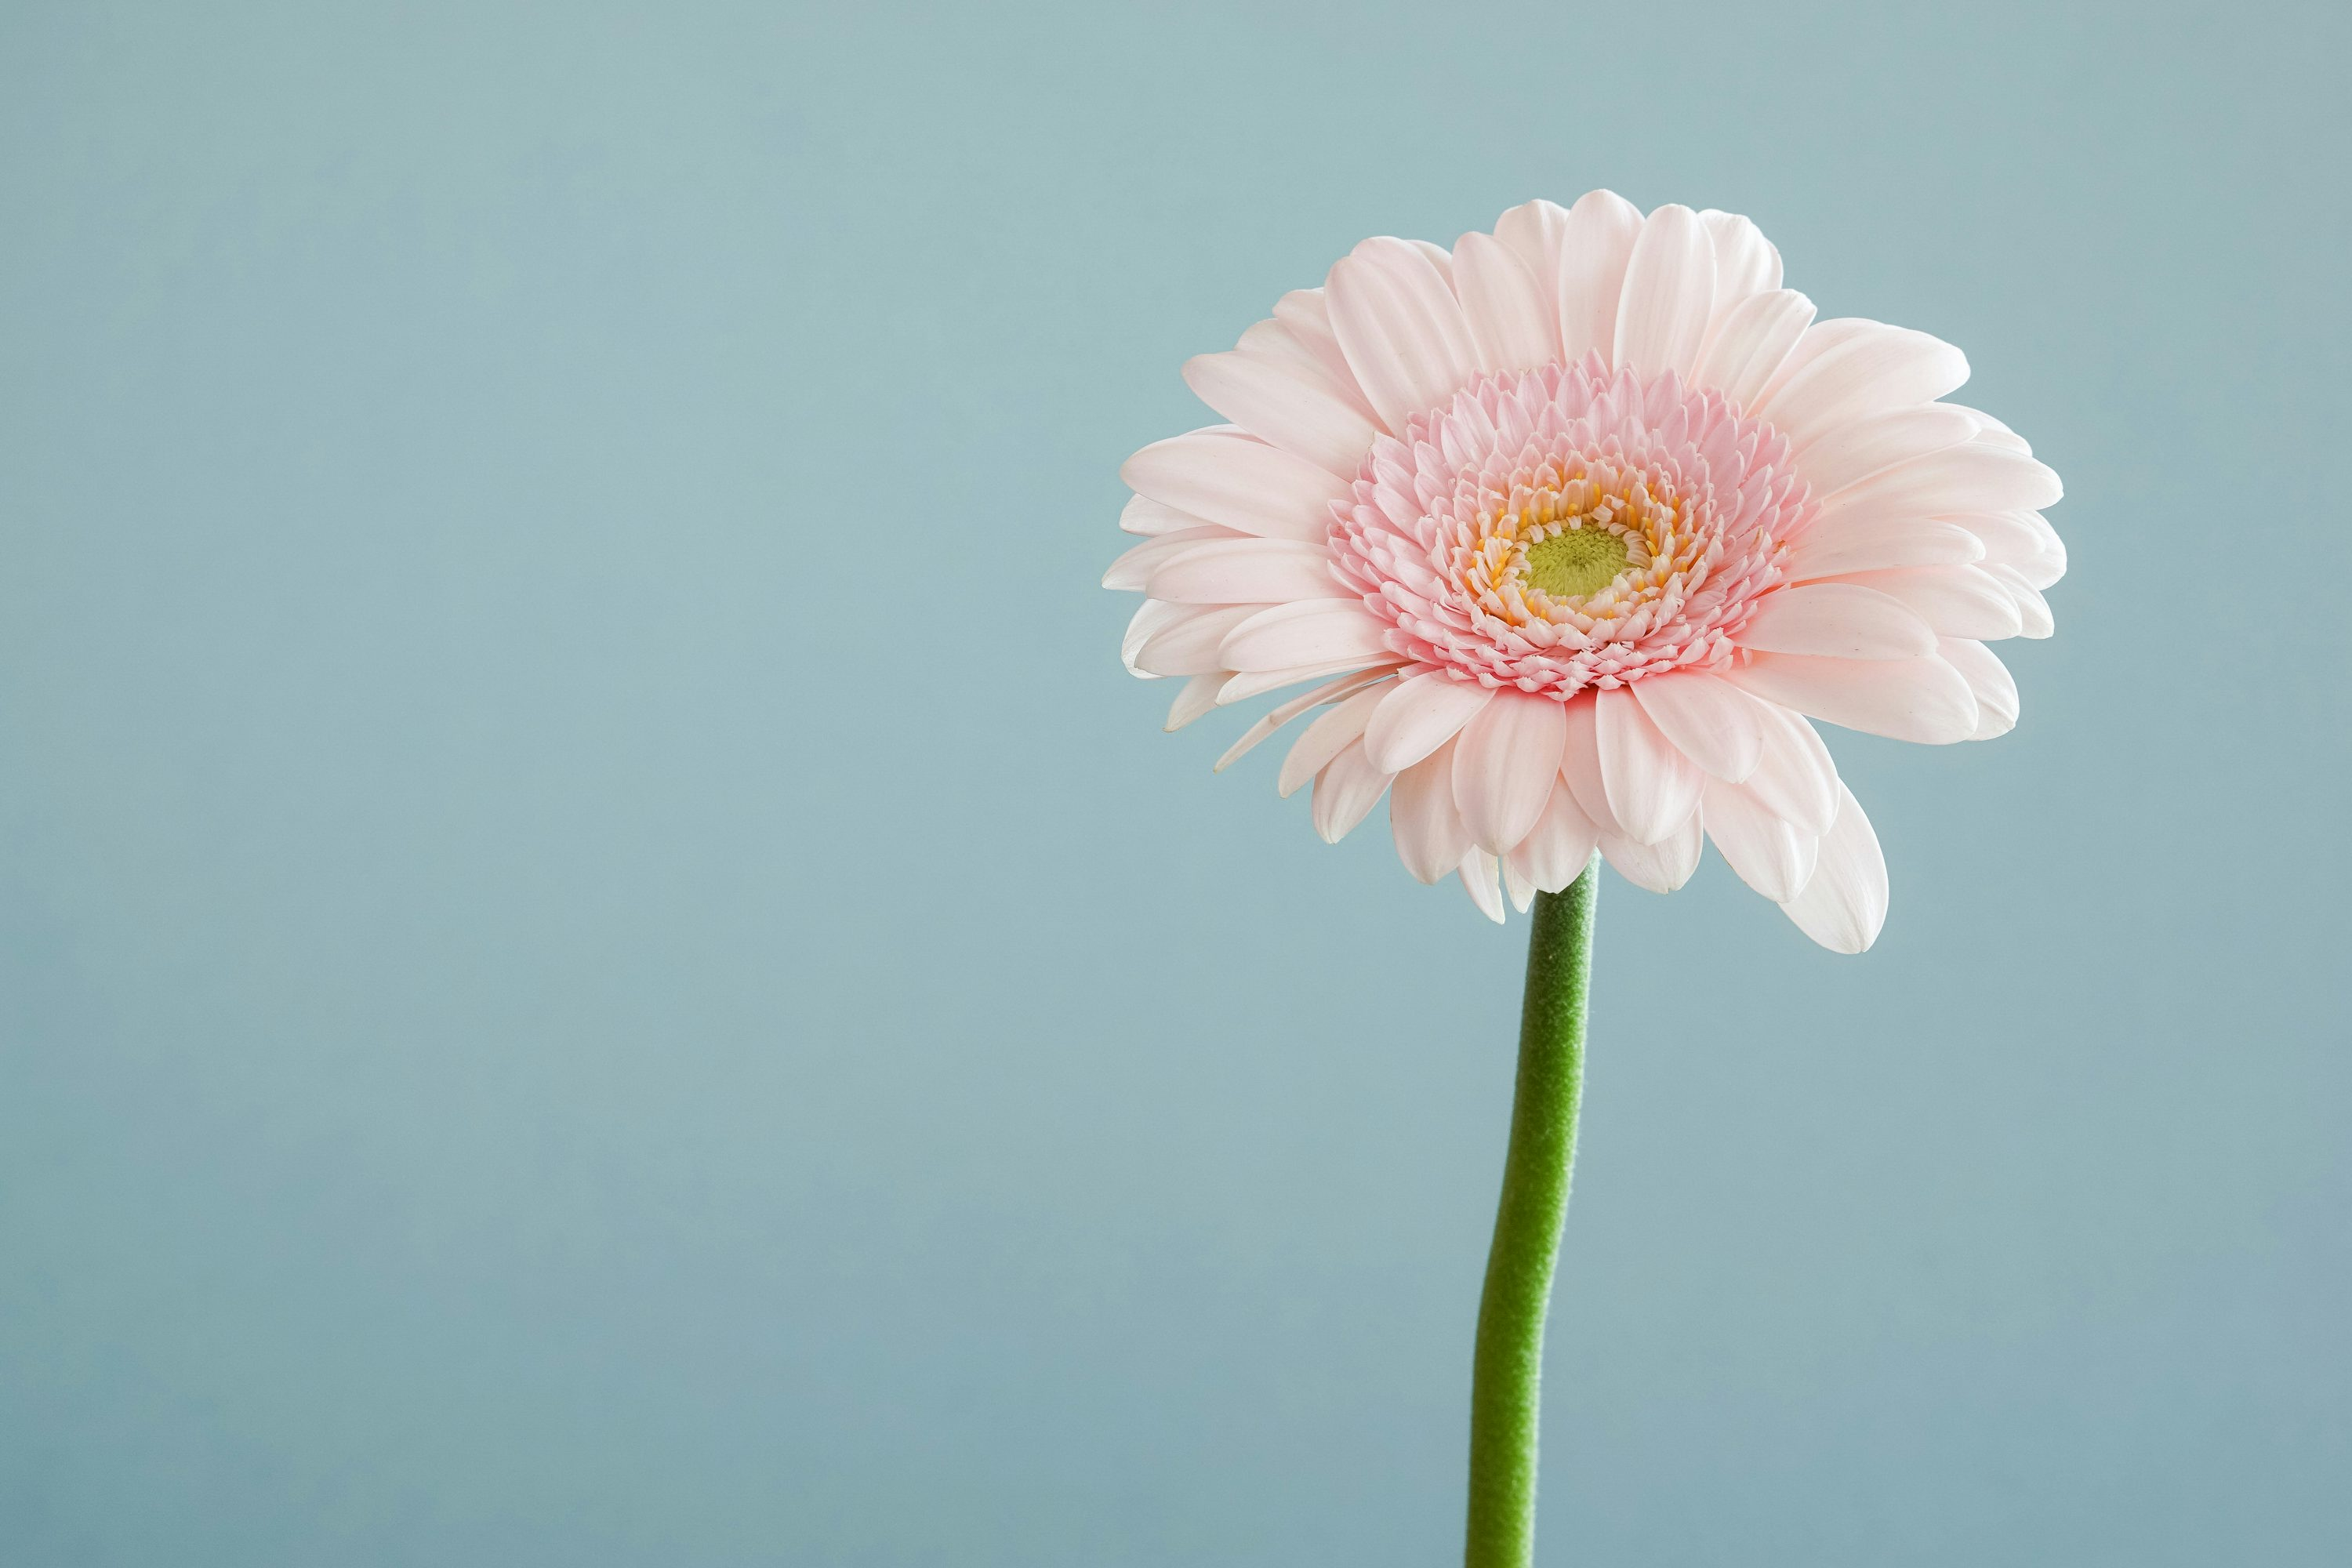

In [3]:
im = Image.open("./images/flower_image.jpeg")
im

In [5]:
im_arr = np.array(im)
print(im_arr.shape)  # it's rgb (2000 x 3000 x 3)

# Convert it to grayscale using linear combination of the RGB channels
R = im_arr[:, :, 0]
G = im_arr[:, :, 1]
B = im_arr[:, :, 2]

im_arr_gray = 0.2989 * R + 0.5870 * G + 0.1140 * B  # known formula for grayscale
im_arr_gray = im_arr_gray.astype(np.uint8)
print(im_arr_gray.shape)  # it's grayscale (2000 x 3000)
Image.fromarray(im_arr_gray).save("./images/flower_image_gray.jpeg")

(2000, 3000, 3)
(2000, 3000)


### Step 2

Teniendo en cuenta la información de las diapositivas, se dice que el SVD da 3 matrices resultantes

$$U \times \Sigma \times V^{T} = A$$

Si $A$ es una matriz $n \times m$, entonces $U$ es $n \times n$, $\Sigma$ es una matriz diagonal $n \times m$ y $V^{T}$ es $m \times m$.

In [101]:
u, s_diag, vt = np.linalg.svd(im_arr_gray)
display(u.shape, s_diag.shape, vt.shape)

(2000, 2000)

(2000,)

(3000, 3000)

In [159]:
# Tecnichally, s_diag is a 1D array, but we need a matrix, so we need to fill the diagonal of s matrix with the values of s_diag
s = np.zeros(im_arr_gray.shape, dtype="float32")

# using fors
# for i in range(min(im_arr_gray.shape)):
#     s[i, i] = s_diag[i]

# using numpy
np.fill_diagonal(s, s_diag)
s.shape

(2000, 3000)

### Step 3 & 4

In [8]:
def reconstruct_image(u: np.ndarray, s: np.ndarray, vt: np.ndarray, k: int) -> np.ndarray:
    """
    Reconstruct the image from the SVD components using the first k singular values.   
    """
    us = u @ s
    usk = us[:, :k]
    vtk = vt[:k, :]
    arr = usk @ vtk
    arr = arr.astype(np.uint8)
    return arr

Reconstruction with k=5 took 0.1182 seconds
Reconstruction with k=10 took 0.1211 seconds
Reconstruction with k=20 took 0.1274 seconds
Reconstruction with k=30 took 0.1142 seconds
Reconstruction with k=50 took 0.1229 seconds
Reconstruction with k=80 took 0.1204 seconds
Reconstruction with k=500 took 0.1565 seconds
Reconstruction with k=1000 took 0.1646 seconds
Reconstruction with k=3000 took 0.2685 seconds


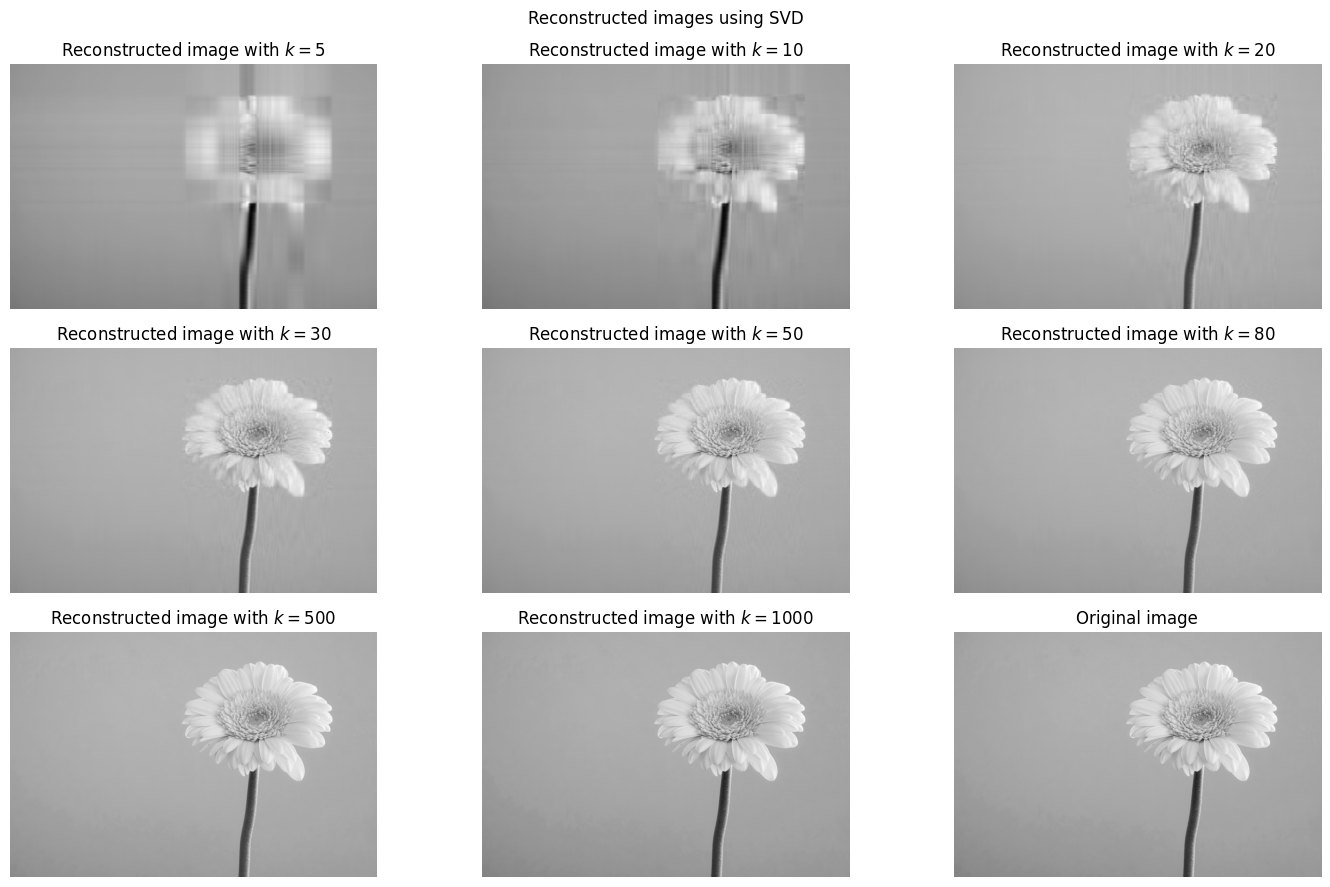

In [135]:
fig, axes = plt.subplots(3, 3, figsize=(16, 9))

k = [5, 10, 20, 30, 50, 80, 500, 1000, 3000]

for k_i, ax in zip(k, axes.flat):
    t0 = perf_counter()
    reconstructed_i = reconstruct_image(u, s, vt, k_i)
    tf = perf_counter() - t0

    print(f"Reconstruction with k={k_i} took {tf:.4f} seconds")

    ax.imshow(reconstructed_i, cmap="gray")
    ax.set_title(f"Reconstructed image with $k={k_i}$")
    ax.axis("off")

axes[2, 2].set_title("Original image")

fig.tight_layout()
fig.suptitle("Reconstructed images using SVD")
fig.tight_layout()  # Avoid that second title overlap the image title

plt.show()

Al analizar las imágenes, se observa que a partir de $k=80$ en adelante, la imagen prácticamente se mantiene idéntica a la original. Con $k=10$, es posible distinguir la flor con cierto esfuerzo, pero a $k=5$ la tarea se vuelve bastante complicada, ya que la compresión es tan intensa que la imagen resulta poco clara, incluso usando la intuición. En los casos de $k=20$ o $k=30$, aunque la imagen se percibe comprimida, sigue siendo comprensible y analizable.

En cuanto a los tiempos de ejecución, en mi experiencia fueron bastante similares para $k \leq 80$, por lo que en esta prueba no hay grandes observaciones adicionales respecto a la eficiencia.

Dado que en este caso la imagen solo contiene una flor, sin demasiados detalles complejos, parece razonable usar valores bajos de $k$ para maximizar la compresión manteniendo la comprensión visual. Sin embargo, surge la duda de cómo se comportaría esta técnica en imágenes con mayor nivel de detalle, donde la pérdida de información podría ser mucho más significativa.

### Step 5

In [6]:
city = Image.open("./images/city.jpg")
city_arr = np.array(city)
print(city_arr.shape)

R = city_arr[:, :, 0]
G = city_arr[:, :, 1]
B = city_arr[:, :, 2]

city_arr_gray = 0.2989 * R + 0.5870 * G + 0.1140 * B  # known formula for grayscale
city_arr_gray = city_arr_gray.astype(np.uint8)
city_gray = Image.fromarray(city_arr_gray)
print(city_arr_gray.shape)

u, s_diag, vt = np.linalg.svd(city_arr_gray)
s = np.zeros(city_arr_gray.shape, dtype="float32")
np.fill_diagonal(s, s_diag)


(4259, 3285, 3)
(4259, 3285)


Reconstruction with k=5 took 0.4698 seconds
Reconstruction with k=10 took 0.4417 seconds
Reconstruction with k=20 took 0.4687 seconds
Reconstruction with k=30 took 0.4520 seconds
Reconstruction with k=50 took 0.4250 seconds
Reconstruction with k=80 took 0.4604 seconds
Reconstruction with k=500 took 0.4772 seconds
Reconstruction with k=1000 took 0.5129 seconds
Reconstruction with k=3000 took 0.6550 seconds


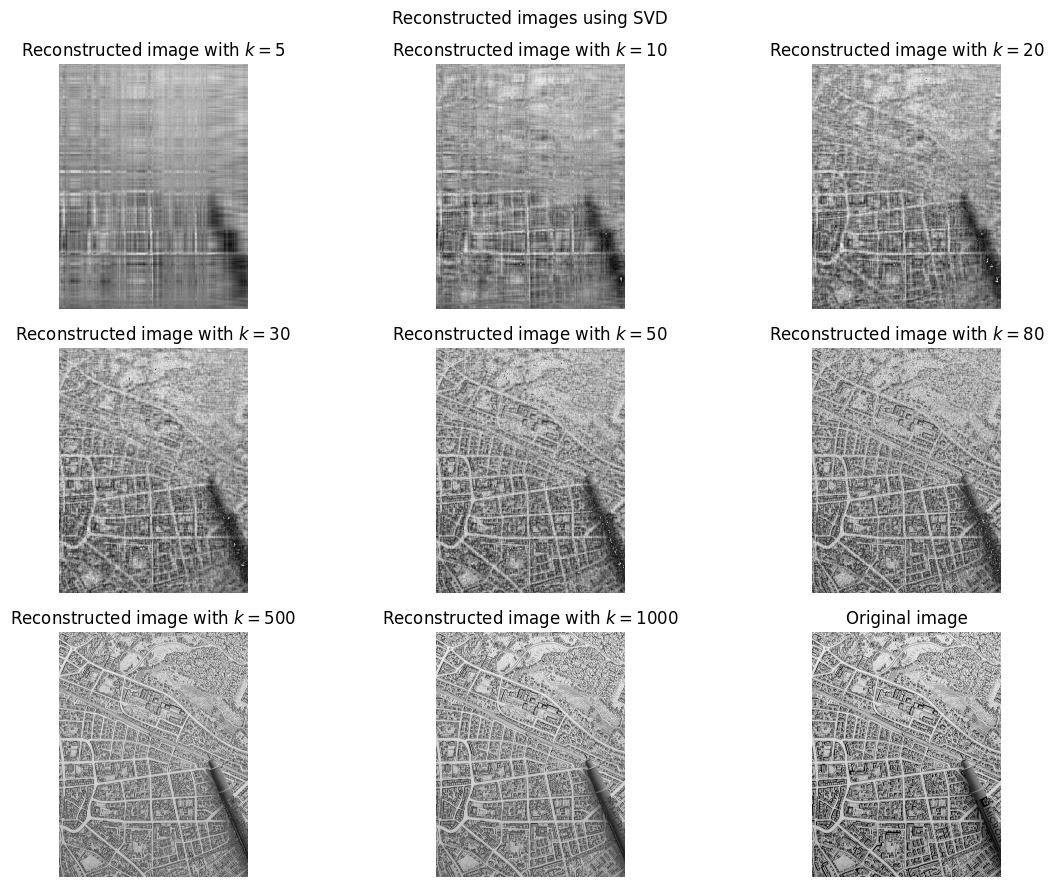

In [9]:
fig, axes = plt.subplots(3, 3, figsize=(16, 9))

k = [5, 10, 20, 30, 50, 80, 500, 1000, 3000]

for k_i, ax in zip(k, axes.flat):
    t0 = perf_counter()
    reconstructed_i = reconstruct_image(u, s, vt, k_i)
    tf = perf_counter() - t0

    print(f"Reconstruction with k={k_i} took {tf:.4f} seconds")

    ax.imshow(reconstructed_i, cmap="gray")
    ax.set_title(f"Reconstructed image with $k={k_i}$")
    ax.axis("off")

axes[2, 2].set_title("Original image")

fig.tight_layout()
fig.suptitle("Reconstructed images using SVD")
fig.tight_layout()  # Avoid that second title overlap the image title

plt.show()

Ahora sí, definitivamente con $k \leq 10$ no se distingue nada, y con $k = 30$ se podría, quizás sea el valor mínimo para lograr distinguir algo, pero tampoco se puede distinguir nada cuando se analiza con detalle.

Nótese que en las imágenes de $20 \leq k \leq 500$ en el lapicero aparece cierto destello blanco, una especie de ruido, desconozco el nombre correcto de este efecto, pero es interesante de ver, de hecho, en $k = 500$ parece haber el mismo efecto en los bordes negro, parece ser el mismo tipo de ruido, [ruido sal y pimienta](http://www.uco.es/~ma1fegan/2015-2016/vision/Temas/ruido.pdf). Claramente, a medida que se va aumentando $k$, este ruido disminuye, como pasa con $k = 1000$

In [12]:
def plot_reconstructed_image(u: np.ndarray, s: np.ndarray, vt: np.ndarray, k: int) -> Image:
    print(f"Reconstructed with k={k}")
    reconstructed = reconstruct_image(u, s, vt, k)
    return Image.fromarray(reconstructed)

In [13]:
city_gray.save("./images/city_gray.jpeg")
for k in (30, 500, 1000):
    plot_reconstructed_image(u, s, vt, k).save(f"./images/city_reconstructed_k{k}.jpeg")

Reconstructed with k=30
Reconstructed with k=500
Reconstructed with k=1000


#### Noise reduction

Ya que se mencionó el ruido de sal y pimienta, se ha visto antes que, técnicamente, cuando se toman valores pequeños de $k$ se ve una imagen comprimida, es decir, una imagen a la cual se le quita información, sin embargo, nos podemos ayudar de esto para poder quitarle el ruido (por ejemplo, el ruido gaussiano) a imágenes, porque cuando se toman una aproximación de bajo rango, se deja por fuera información que no explican las variaciones en esta, como es el ruido.

En la práctica, puede ser complejo utilizar un valor de $k$ óptimo para reducir lo máximo posible el ruido, aunque existen maneras, estas no se tratan aquí. 

Ver las imágenes [ruidosa original](./images/flower_image_gray_noisy.jpeg) y [ruidosa reconstruida](./images/flower_image_gray_noisy_reconstructed_k150.jpeg) para más claridad.

In [150]:
im_arr_gray_noisy = im_arr_gray + 60 * np.random.randn(*im_arr_gray.shape)
im_arr_gray_noisy = im_arr_gray_noisy.clip(0, 255).astype(np.uint8)

Image.fromarray(im_arr_gray_noisy).save("./images/flower_image_gray_noisy.jpeg")

In [151]:
u, s_diag, vt = np.linalg.svd(im_arr_gray_noisy, full_matrices=False)  # It's not necessary to compute the full matrices
s = np.zeros(im_arr_gray_noisy.shape, dtype="float32")
np.fill_diagonal(s, s_diag)

display(u.shape, s.shape, vt.shape)

(2000, 2000)

(2000, 3000)

(2000, 3000)

In [156]:
k = 150  # @param
k_value = min(*im_arr_gray_noisy.shape, k)
reconstructed_k = (u @ s)[:, :k_value] @ vt[:k_value, :]
print(reconstructed_k.shape)
reconstructed_k = reconstructed_k.clip(0, 255).astype(np.uint8)

Image.fromarray(reconstructed_k) \
    .save(f"./images/flower_image_gray_noisy_reconstructed_k{k_value}.jpeg")

(2000, 3000)


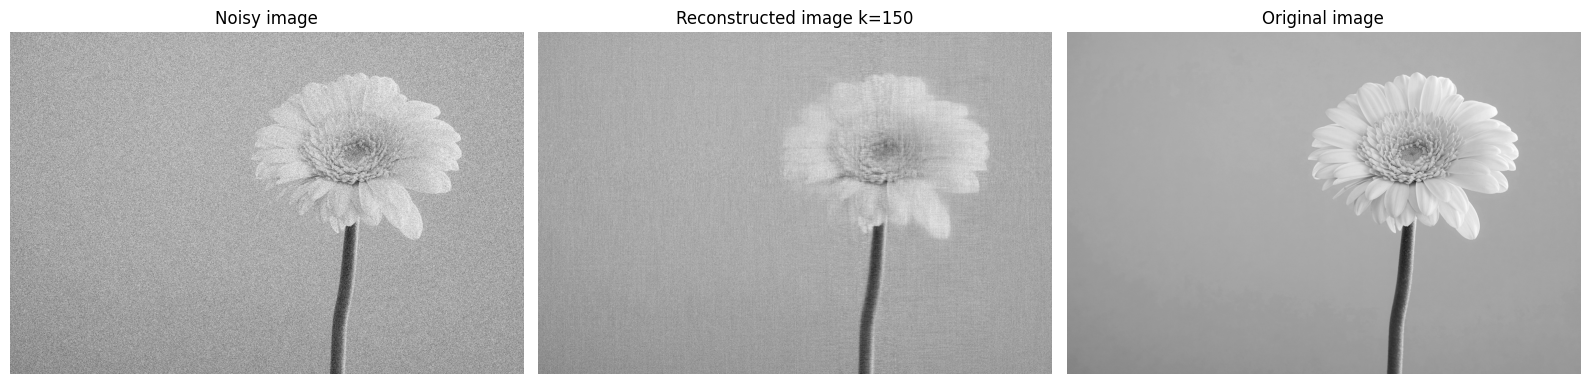

In [157]:
fig, axes = plt.subplots(1, 3, figsize=(16, 12))

for ax, img, title in zip(
    axes,
    (im_arr_gray_noisy, reconstructed_k, im_arr_gray),
    ("Noisy image", f"Reconstructed image k={k_value}", "Original image")
):
    ax.imshow(img, cmap="gray")
    ax.set_title(title)
    ax.axis("off")

fig.tight_layout()
plt.show()